<a href="https://colab.research.google.com/github/Anshuman22coder/ML-projects/blob/main/patient_Condition_Classification_Nlp_using_TFIDF_BAG_OF_WORDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# patient condition classification  using drug's review...
#patient Condition_Classification_Nlp_using_TFIDF_BAG_OF_WORDS

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
#TO show all the rows
pd.set_option('display.max_rows', None)


In [19]:
df=pd.read_csv('/content/drugsComTrain.csv')   # local computer ---"C:\Users\itisa\OneDrive\Desktop\ML DATASETS\ML DATASETS COPY\drugsComTrain.csv"
df.head()
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321
Vaginal Yeast Infection                                                 2274
Abnormal Uterine Bleeding                                               2096
Bowel Preparation                                                       1859
ibromyalgia                                                             1791
Smoking Cessation                                                       1780
Migraine                                                                1694
Anxiety and Stress                                                      1663
Major Depressive Disorde                                                1607
Constipation                                                            1595
Panic Disorde                                                           1463
Chronic Pain                                                            1455
Migraine Prevention                                                     1413
Urinary Tract Infection                                                 1316
Muscle Spasm                                                            1244
Osteoarthritis                                                          1239
Generalized Anxiety Disorde                                             1164
Erectile Dysfunction                                                    1086
Opiate Dependence                                                       1079
Irritable Bowel Syndrome                                                1014
Rheumatoid Arthritis                                                     995
Allergic Rhinitis                                                        973
Bacterial Infection                                                      945
Cough                                                                    927
Sinusitis                                                                835
Nausea/Vomiting                                                          747
GERD                                                                     722
Multiple Sclerosis                                                       698
Overactive Bladde                                                        683
Hyperhidrosis                                                            677
Hepatitis C                                                              656
Back Pain                                                                616
HIV Infection                                                            615
High Cholesterol                                                         611
Psoriasis                                                                598
Schizophrenia                                                            594
Constipation, Chronic                                                    591
Obsessive Compulsive Disorde                                             579
Restless Legs Syndrome                                                   565
Benign Prostatic Hyperplasia                                   

In [8]:
#df.condition.value_counts()

In [9]:
df_train=df[(df['condition']=="Birth Control") | (df['condition']=="Depression") | (df['condition']=="Diabetes, Type 2") | (df['condition']=="High Blood Pressure") ]

In [12]:
df.shape

(161297, 7)

In [17]:
df_train.head()

Unnamed: 0                            drugName  ...               date usefulCount
2        92703                              Lybrel  ...  December 14, 2009          17
3       138000                          Ortho Evra  ...   November 3, 2015          10
9        48928  Ethinyl estradiol / levonorgestrel  ...   December 8, 2016           1
11       75612                      L-methylfolate  ...      March 9, 2017          54
14       98494                           Nexplanon  ...     August 7, 2014          10

[5 rows x 7 columns]

In [11]:
df_train.shape

(42732, 7)

In [14]:
X=df_train.drop(['Unnamed: 0',"drugName", "rating","date","usefulCount"],axis=1)

In [16]:
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

In [13]:
####EDA####


In [18]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: count, dtype: int64

In [20]:

#segregating dataframe for analyzing individual condition
X_birth=X[X['condition']=="Birth Control"]
X_dep=X[X['condition']=="Depression"]
X_diab=X[X['condition']=="Diabetes, Type 2"]
X_bp=X[X['condition']=="High Blood Pressure"]

Text(0.5, 1.0, 'world cloud for birth control')

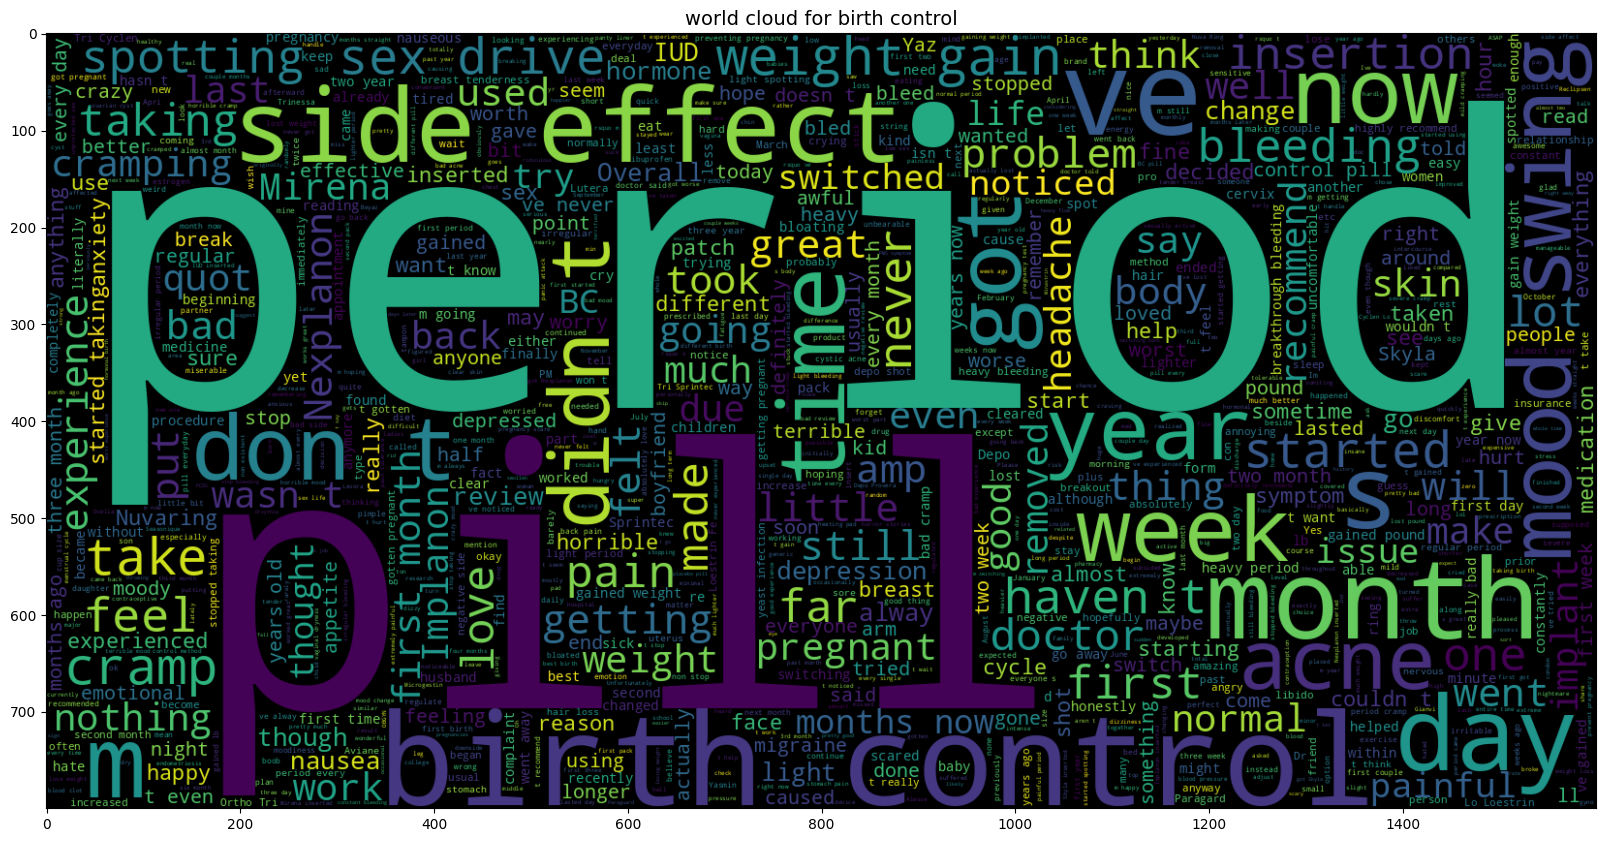

In [21]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800).generate(" ".join(X_birth.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("world cloud for birth control",fontsize=14)

Text(0.5, 1.0, 'world cloud for birth control')

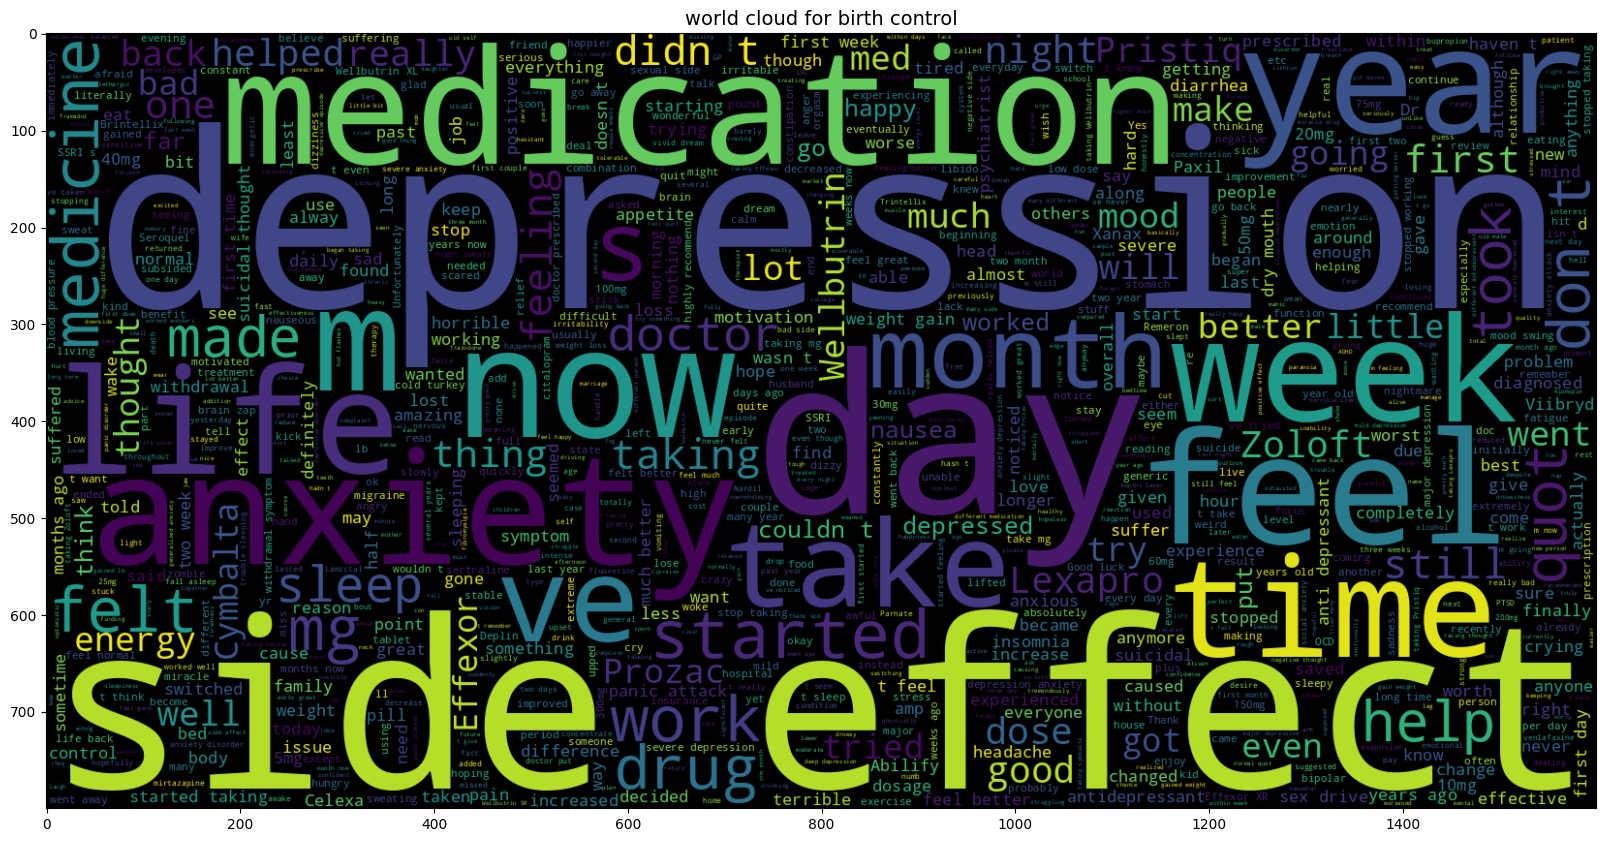

In [22]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800).generate(" ".join(X_dep.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("world cloud for depression",fontsize=14)

Text(0.5, 1.0, 'world cloud for birth control')

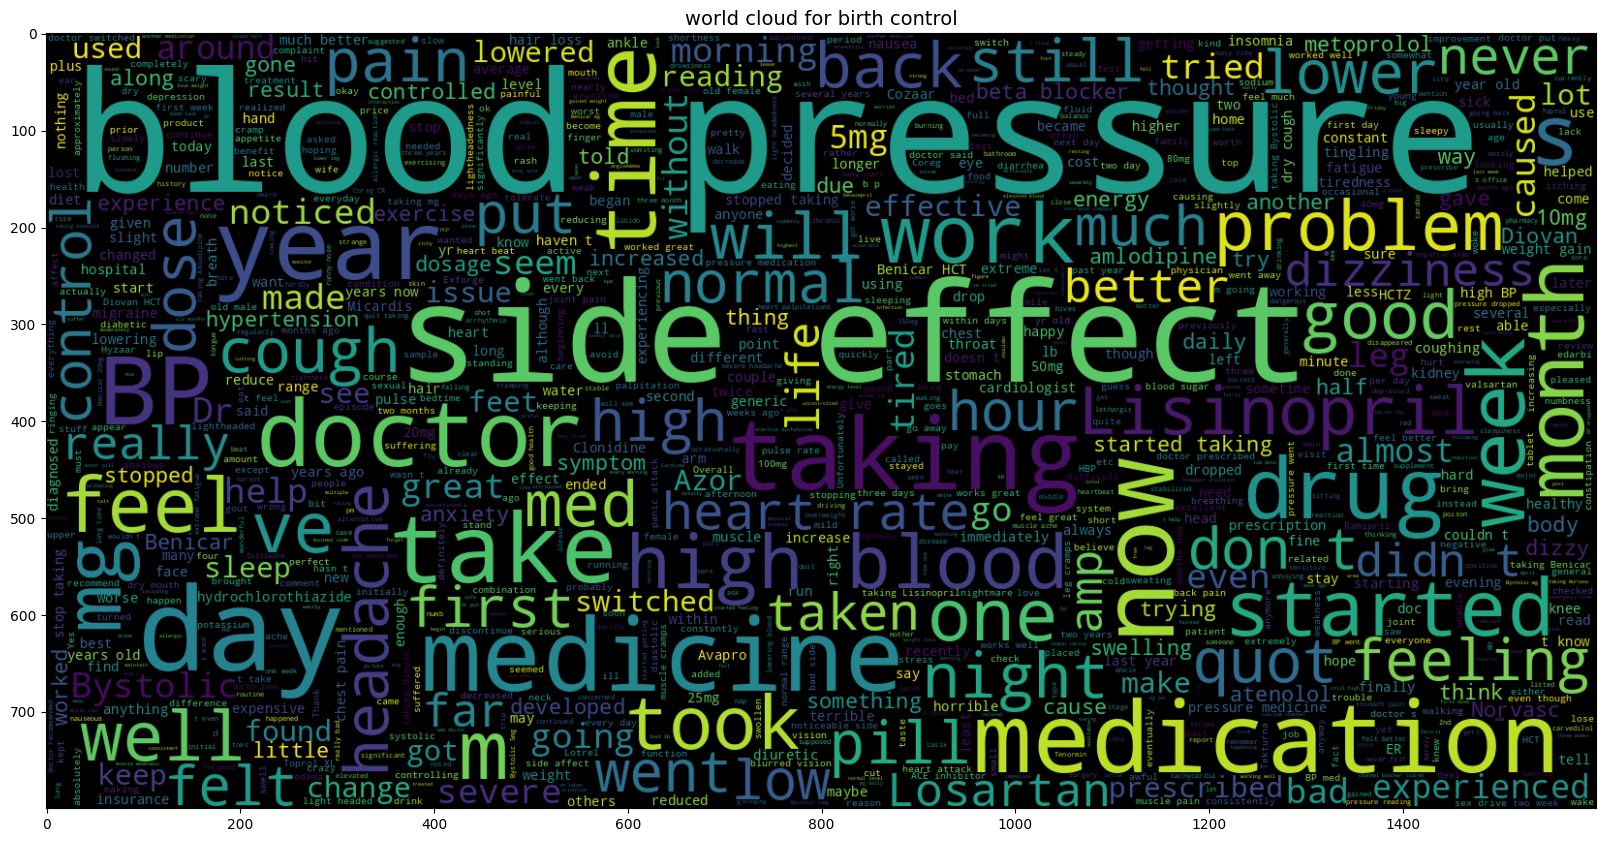

In [23]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800).generate(" ".join(X_bp.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("world cloud for high_bp",fontsize=14)

Text(0.5, 1.0, 'world cloud for birth control')

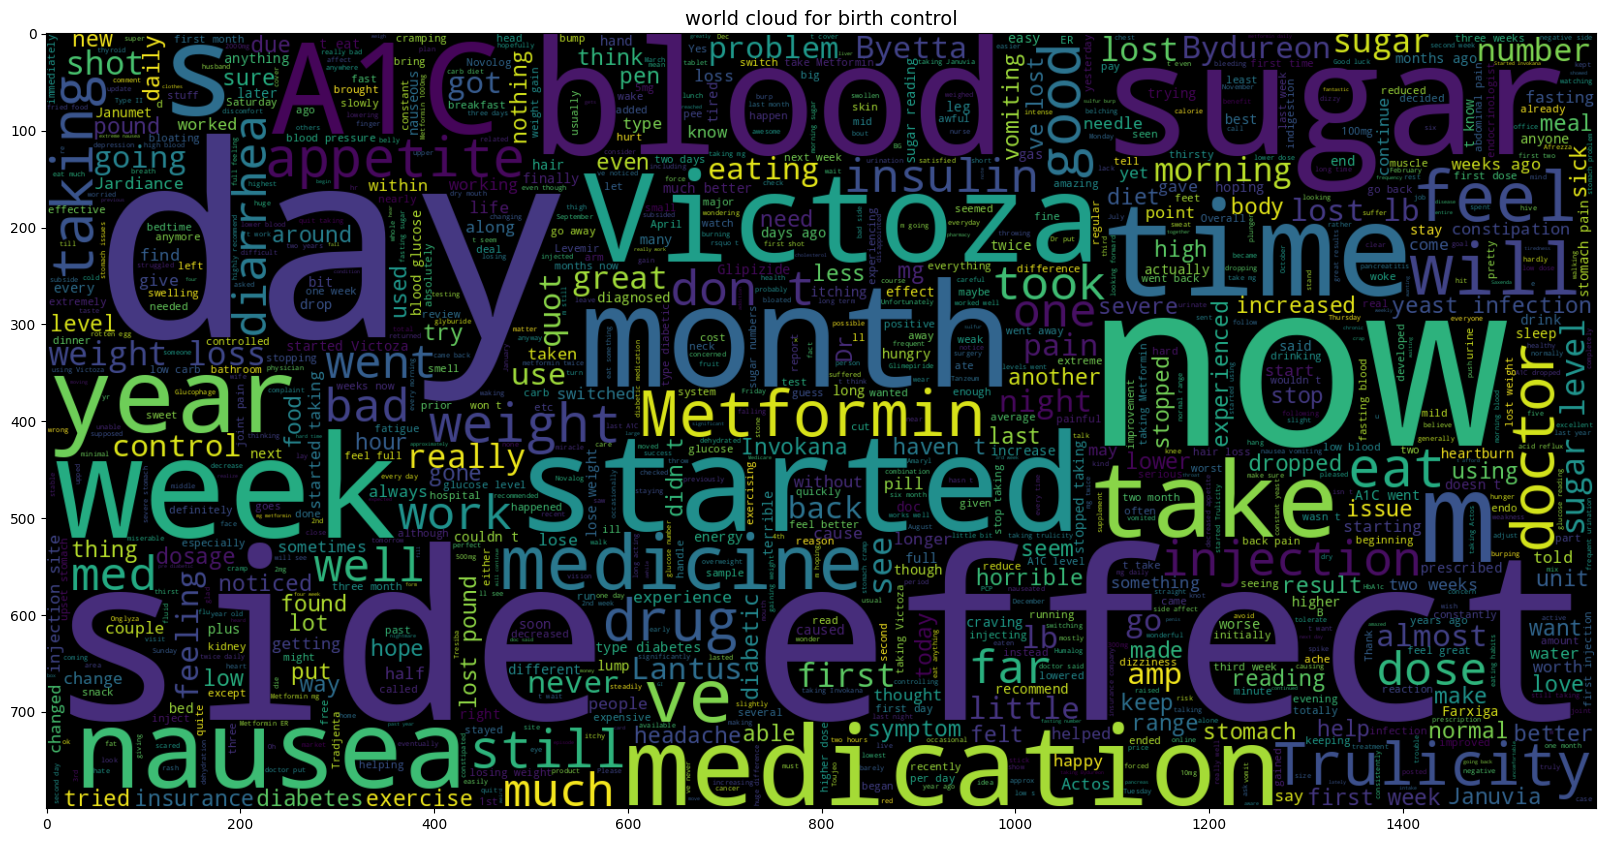

In [24]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800).generate(" ".join(X_diab.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("world cloud for diabetes",fontsize=14)

In [25]:
#data processing#\n\r are to be removed along with ""


In [31]:
print(X.columns)
for i, col in enumerate(X.columns):  # used in enumerating or looping through datframes and numpy ,, here we enumerate through the total column and one by one for each column , the " " is removed
  X.iloc[:,i] = X.iloc[:,i].str.replace('"', '')


Index(['condition', 'review'], dtype='object')


In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
#removing the stopwordsss.
from nltk.corpus import stopwords
stop= stopwords.words('english')
print(stop)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [36]:
#lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [37]:
from bs4 import BeautifulSoup
import re

In [42]:
def reviews_to_words(raw_review):
  review_text=BeautifulSoup(raw_review,"html.parser").get_text()  # parse html.. like ex==raw_review = '<div><p>This medication really helped me! <strong>Highly recommend it.</strong></p></div>'    then we would be getting This medication really helped me! Highly recommend it.
  letters_only=re.sub("[^a-zA-Z]"," ",review_text)  # make a space  # meaning anything that is not lower or upper case character would be removed ..
  words=letters_only.lower().split()       #to lower letters and then we spilt the string based on white spaces or new line and ,,,note that no extra spaces will be there,,,as spilt() ignores extra spaces..
  meaningful_words=[w for w in words if not w in stop ] # stopwords  # checking for stopwords and if it is not the stopwords then only w is updates,,,at time when the if is true then the w will be appended to the meaningful_words implicitly
  lemmatized_words=[lemmatizer.lemmatize(w) for w in meaningful_words] # lemmatization
  return (" ".join(lemmatized_words))   # space joined words..

In [44]:
import nltk
nltk.download('wordnet')
X['review_clean']=X['review'].apply(reviews_to_words) # the review_to_words takes the X[review as input and gives the lemmatized and pre-processed as in  return]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [82]:
X.head(1)


condition  ...                                       review_clean
2  Birth Control  ...  used take another oral contraceptive pill cycl...

[1 rows x 3 columns]

In [54]:
X_feat=X.review_clean
print(X_feat.shape)

(42732,)


In [55]:

Y=X['condition']
print(Y.shape)

(42732,)


In [58]:
#splitting the dataset..

X_train,X_test,Y_train,Y_test=train_test_split(X_feat,Y,test_size=0.2,random_state=0)

In [57]:
# bag of wordss...
count_vectorizer=CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

In [75]:
##Machine Learning model:: Naive Bayes
from sklearn.metrics import confusion_matrix
nmb=MultinomialNB()
nmb.fit(count_train,Y_train)
pred=nmb.predict(count_test)
score=metrics.accuracy_score(Y_test,pred)
print("accuracy:   %0.3f" % score)
cm=confusion_matrix(Y_test,pred)
print(cm)


accuracy:   0.973
[[5724   36    4   11]
 [  35 1711   10   18]
 [  16   18  466   13]
 [  13   52    5  415]]


In [77]:
#machine leanring model... passive aggressive classifier
from sklearn.metrics import confusion_matrix
pb=PassiveAggressiveClassifier()
pb.fit(count_train,Y_train)
pred=pb.predict(count_test)
score=metrics.accuracy_score(Y_test,pred)
print("accuracy:   %0.3f" % score)
cm=confusion_matrix(Y_test,pred)
print(cm)      # more accurate model ,, the confusion matrix shows it all


accuracy:   0.981
[[5749   20    4    2]
 [  23 1729   10   12]
 [   6   19  477   11]
 [  10   41    5  429]]


In [78]:






#######TF_IDF############


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8)   # max_df signifies that all words that are occuring >80% in sentences are exlcuded..
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

In [80]:
##Machine Learning model:: Naive Bayes
from sklearn.metrics import confusion_matrix
nmb=MultinomialNB()
nmb.fit(tfidf_train,Y_train)
pred=nmb.predict(tfidf_test)
score=metrics.accuracy_score(Y_test,pred)
print("accuracy:   %0.3f" % score)
cm=confusion_matrix(Y_test,pred)
print(cm)  # the accuarcy decreased for tf-idf


accuracy:   0.921
[[5767    7    1    0]
 [ 168 1606    0    0]
 [ 189   41  282    1]
 [ 167  100    0  218]]


In [81]:
#machine leanring model... passive aggressive classifier
from sklearn.metrics import confusion_matrix
pb=PassiveAggressiveClassifier()
pb.fit(tfidf_train,Y_train)
pred=pb.predict(tfidf_test)
score=metrics.accuracy_score(Y_test,pred)
print("accuracy:   %0.3f" % score)
cm=confusion_matrix(Y_test,pred)
print(cm)      # more accurate model ,, the confusion matrix shows it all


accuracy:   0.986
[[5758   12    4    1]
 [  16 1742    6   10]
 [   5   13  490    5]
 [   7   33    7  438]]


In [88]:
###prediction###
text=[" Control	I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge. The positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."]
test=pb.predict(tfidf_vectorizer.transform(text))  # no reshape req... bcz,,,we have already given it a 1 d list and the X on which the model was trained was also a 1-d ..with >44444 rows
print(test[0])
print(X[0:1])   # as we can see prediction and the actual condition is same .. so the precition is accuarate

Birth Control
       condition  ...                                       review_clean
2  Birth Control  ...  used take another oral contraceptive pill cycl...

[1 rows x 3 columns]
